In [1]:
from graphviz import Digraph, Source, render
import networkx as nx 
import pydot


"""
Aim: Removing edge in a graphviz is not possible directly. So
1. Create a networkx graph
2. Render as Graphviz
3. Change the networkx graph
4. Render again as Graphviz
"""
# 1. Create a networkx graph
def createNx():
    
    default_node_attr = {'shape':'circle','width':'0.4','style':'filled','fixedsize':'true'}   
    highlight_node_attr = {'fillcolor':'green','shape':'circle','width':'0.4','style':'filled','fixedsize':'true'}
    highlight_edge_attr = {'fillcolor':'#eabc77','shape':'circle','width':'0.4','style':'filled','fixedsize':'true'}
    X = nx.Graph()            

    baseNode = 'A'
    childNodes = ['S','T','Z']

    X.add_node(baseNode, **default_node_attr)
    for eachChild in childNodes:
        X.add_node(eachChild, **default_node_attr)
        X.add_edge(baseNode, eachChild)

    baseNode = 'S'
    childNodes = ['O','RV','F']    

    X.add_node(baseNode, **highlight_node_attr)
    for eachChild in childNodes:
        X.add_node(eachChild, **highlight_edge_attr)
        X.add_edge(baseNode, eachChild)  

    baseNode = 'F'
    childNodes = ['B']    

    X.add_node(baseNode, **default_node_attr)
    for eachChild in childNodes:
        X.add_node(eachChild, **default_node_attr)
        X.add_edge(baseNode, eachChild)


    baseNode = 'RV'
    childNodes = ['C','P']    

    X.add_node(baseNode, **default_node_attr)
    for eachChild in childNodes:
        X.add_node(eachChild, **default_node_attr)
        X.add_edge(baseNode, eachChild)

    # nx.set_node_attributes(X, node_attributes)        not working

    return X

treeX = createNx()      
print("Nodes: {} Edges: {}".format( treeX.number_of_nodes(), treeX.number_of_edges() ))

Nodes: 10 Edges: 9


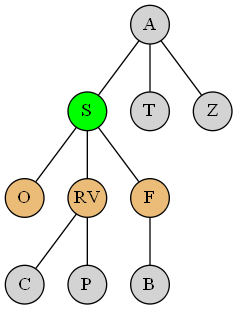

In [2]:
# 2.  Render as Graphviz
from IPython.display import display, Image

from graphviz import Source, render
def nxToDot(X):

    #  NETWORX TO PYDOT TO GRAPHVIZ MODULE
    P = nx.nx_pydot.to_pydot(X)
    #print(P)
    
    M = Source(P, engine='dot',format='png')
    return M.pipe()

treeG = nxToDot(treeX)
display(Image(treeG))

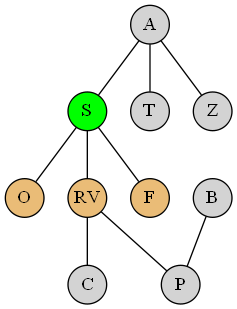

In [3]:
# modifying the tree
treeX.remove_edge('F', 'B')
treeX.add_edge('P', 'B')

# rendering in graphviz again..
treeG = nxToDot(treeX)
display(Image(treeG))

Converting to library for docHelpers_ipython.py...

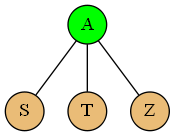

In [4]:
from graphviz import Digraph, Source
import networkx as nx 
import pydot

def initializeTreeX():
    X = nx.Graph() 
    return X

def computeGraphs(baseNode, childNodes):
    
    highlight_node_attr = {'fillcolor':'green','shape':'circle','width':'0.4','style':'filled','fixedsize':'true'}
    highlight_edge_attr = {'fillcolor':'#eabc77','shape':'circle','width':'0.4','style':'filled','fixedsize':'true'}
        
    X.add_node(baseNode, **highlight_node_attr)
    for eachChild in childNodes:
        X.add_node(eachChild, **highlight_edge_attr)
        X.add_edge(baseNode, eachChild)
        
    return nxToDot(X)
        
def nxToDot(X):

    P = nx.nx_pydot.to_pydot(X)   
    M = Source(P, engine='dot',format='png')
    return M.pipe()

X = initializeTreeX()
baseNode = 'A'
childNodes = ['S','T','Z'] 
image = computeGraphs(baseNode, childNodes)
display(Image(image))

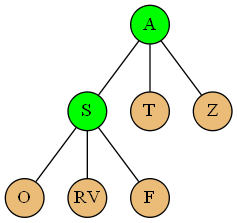

In [5]:
baseNode = 'S'
childNodes = ['O','RV','F'] 
image = computeGraphs(baseNode, childNodes)
display(Image(image))

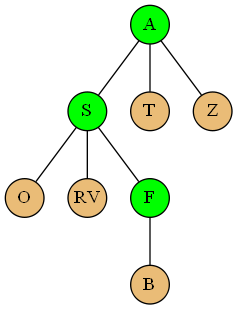

In [6]:
baseNode = 'F'
childNodes = ['B']  
image = computeGraphs(baseNode, childNodes)
display(Image(image))

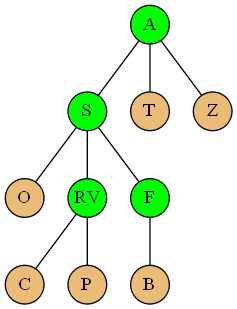

In [7]:
baseNode = 'RV'
childNodes = ['C','P']  
image = computeGraphs(baseNode, childNodes)
display(Image(image))

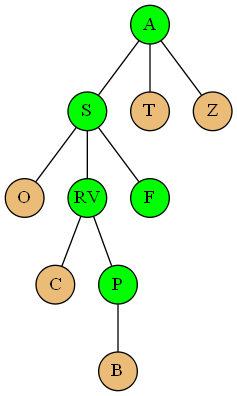

In [8]:
# modifying the tree
X.remove_edge('F', 'B')
X.remove_node('B')

baseNode = 'P'
childNodes = ['B']  
image = computeGraphs(baseNode, childNodes)
display(Image(image))

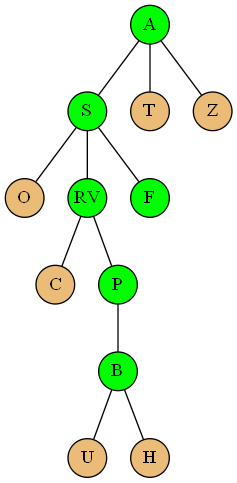

In [9]:
baseNode = 'B'
childNodes = ['U','H']  
image = computeGraphs(baseNode, childNodes)
display(Image(image))

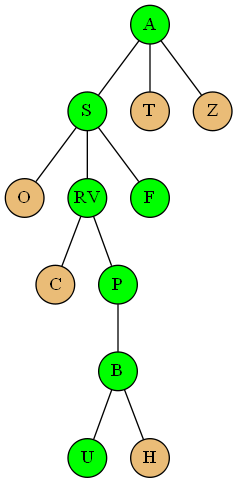

In [10]:
baseNode = 'U'
childNodes = []  
image = computeGraphs(baseNode, childNodes)
display(Image(image))